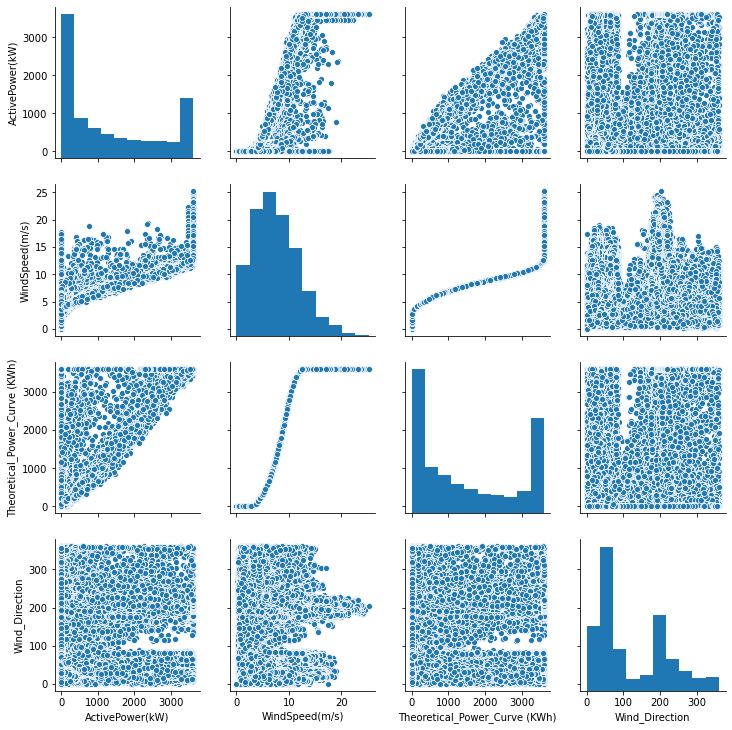

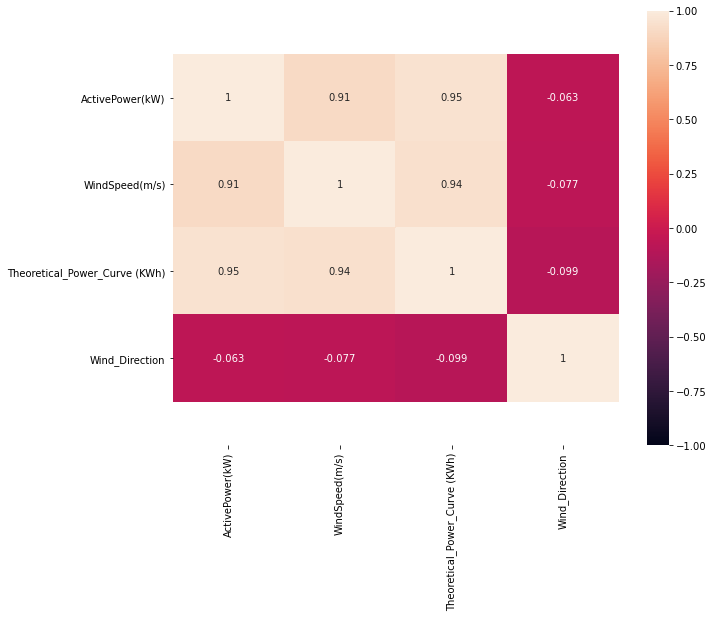

162.90854947468148
0.9015204242180791


['power_prediction.sav']

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


df = pd.read_csv('T1.csv')

df.rename(columns={'Date/Time':'Time',
                   'LV ActivePower (kW)':'ActivePower(kW)',
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Wind Direction (°)":"Wind_Direction"},
                    inplace=True)
sns.pairplot(df)

corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

'''
The heat map clearly tells us that there's no realtion between wind direction and 
the Power generated but Wind speed, Theoritical power and Actual power generated 
have a very positive correlation
'''

#df.drop(['Wind_Direction'],axis=1,inplace = True)
df["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H:%M", errors = "coerce")
df

y = df['ActivePower(kW)'] #'Theoretical_Power_Curve (KWh)'
X = df[['Theoretical_Power_Curve (KWh)','WindSpeed(m/s)']]#'ActivePower(kW)'

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

forest_model = RandomForestRegressor(max_leaf_nodes =500, random_state=1)
forest_model.fit(train_X, train_y)

power_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, power_preds))
print(r2_score(val_y,power_preds))
joblib.dump(forest_model, "power_prediction.sav")
